In [34]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [35]:
warnings.filterwarnings("ignore", category=UserWarning)

# 1.Import Libraries

Standrad Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Scikit-learn modules

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset from sklearn

In [5]:
# Load the California Housing Prices dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Exploratory Data Analysis

In [13]:
df.shape

(20640, 9)

In [7]:
df['MedHouseVal'] = data.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [21]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [23]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [25]:
df.nunique().sum()

74882

In [24]:
# Display unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values[:10]}")  # Displaying first 10 unique values for brevity
    print(f"Number of unique values in '{column}': {len(unique_values)}\n")

Unique values in 'MedInc': [8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591 3.12   2.0804 3.6912]
Number of unique values in 'MedInc': 12928

Unique values in 'HouseAge': [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.]
Number of unique values in 'HouseAge': 52

Unique values in 'AveRooms': [6.98412698 6.23813708 8.28813559 5.8173516  6.28185328 4.76165803
 4.93190661 4.79752705 4.29411765 4.97058824]
Number of unique values in 'AveRooms': 19392

Unique values in 'AveBedrms': [1.02380952 0.97188049 1.07344633 1.07305936 1.08108108 1.10362694
 0.95136187 1.0618238  1.11764706 0.99019608]
Number of unique values in 'AveBedrms': 14233

Unique values in 'Population': [ 322. 2401.  496.  558.  565.  413. 1094. 1157. 1206. 1551.]
Number of unique values in 'Population': 3888

Unique values in 'AveOccup': [2.55555556 2.10984183 2.80225989 2.54794521 2.18146718 2.13989637
 2.12840467 1.78825348 2.02689076 2.17226891]
Number of unique values in 'AveOccup': 18841

Unique values in 'Latitude': [37.88 3

In [43]:
#minimum price
df.MedHouseVal.min()

0.14999

In [44]:
#maximum price
df.MedHouseVal.max()

5.00001

In [45]:
#standrad deviation
df.MedHouseVal.std()

1.1539561587441483

In [16]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

In [28]:
# Define a custom color palette with flourish
flourish_palette = ['#FF85A2', '#FF9F84', '#FFAB73', '#FFC971', '#FFE17D']

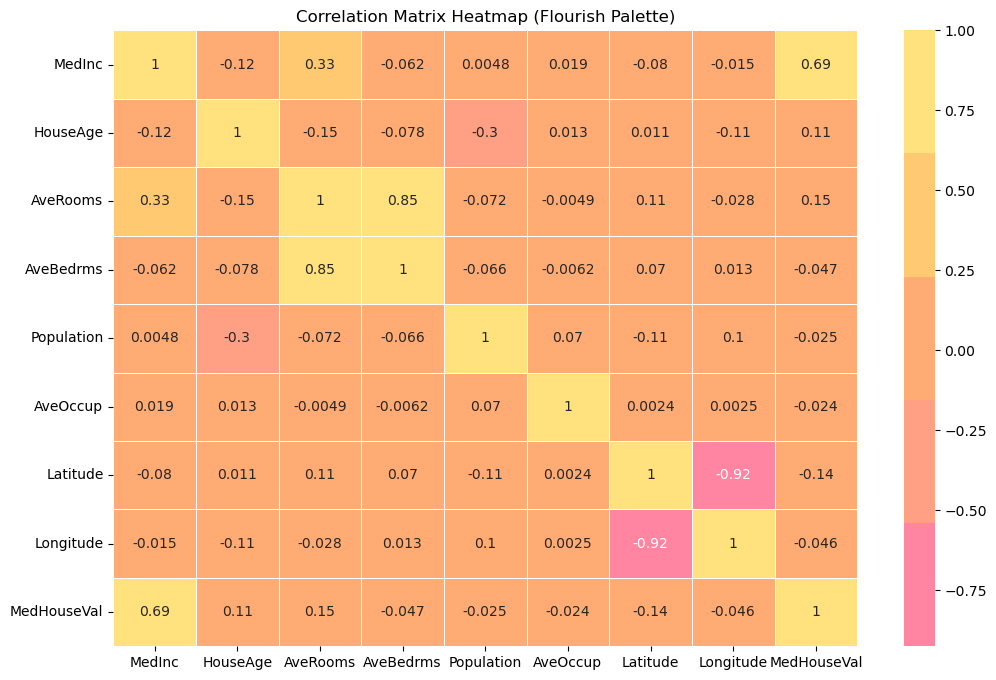

In [27]:
# Heatmap of the correlation matrix with the custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=flourish_palette, linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Flourish Palette)')
plt.show()


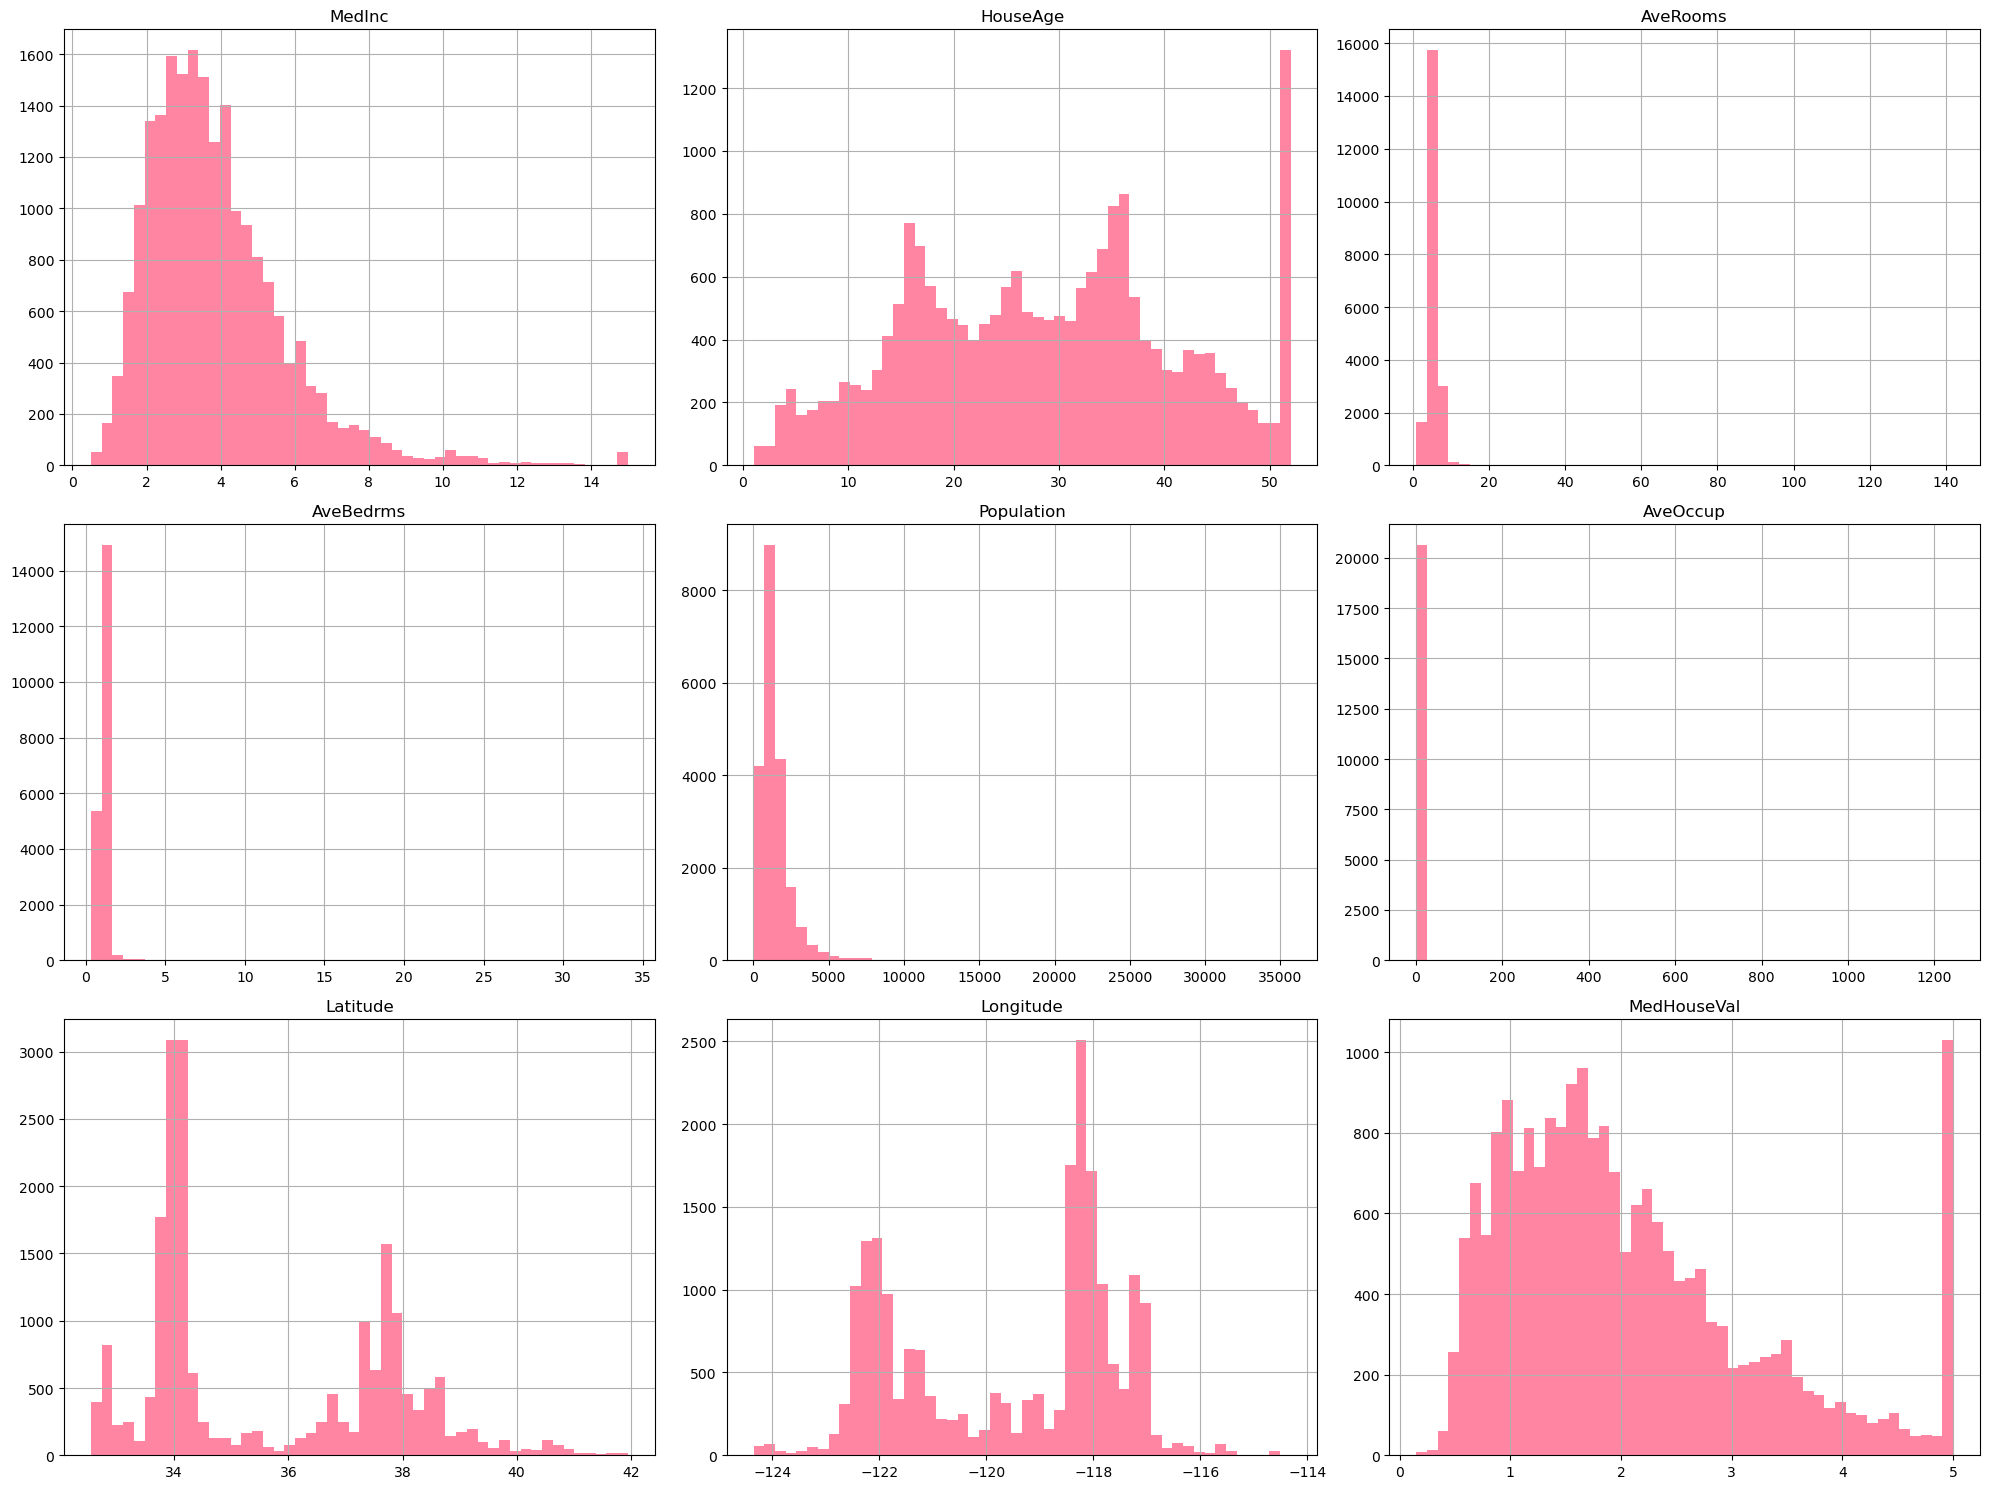

In [29]:
# Plot histograms for all features
# Histograms with custom color palette
df.hist(bins=50, figsize=(20,15), color=flourish_palette[0])
plt.tight_layout()
plt.show()

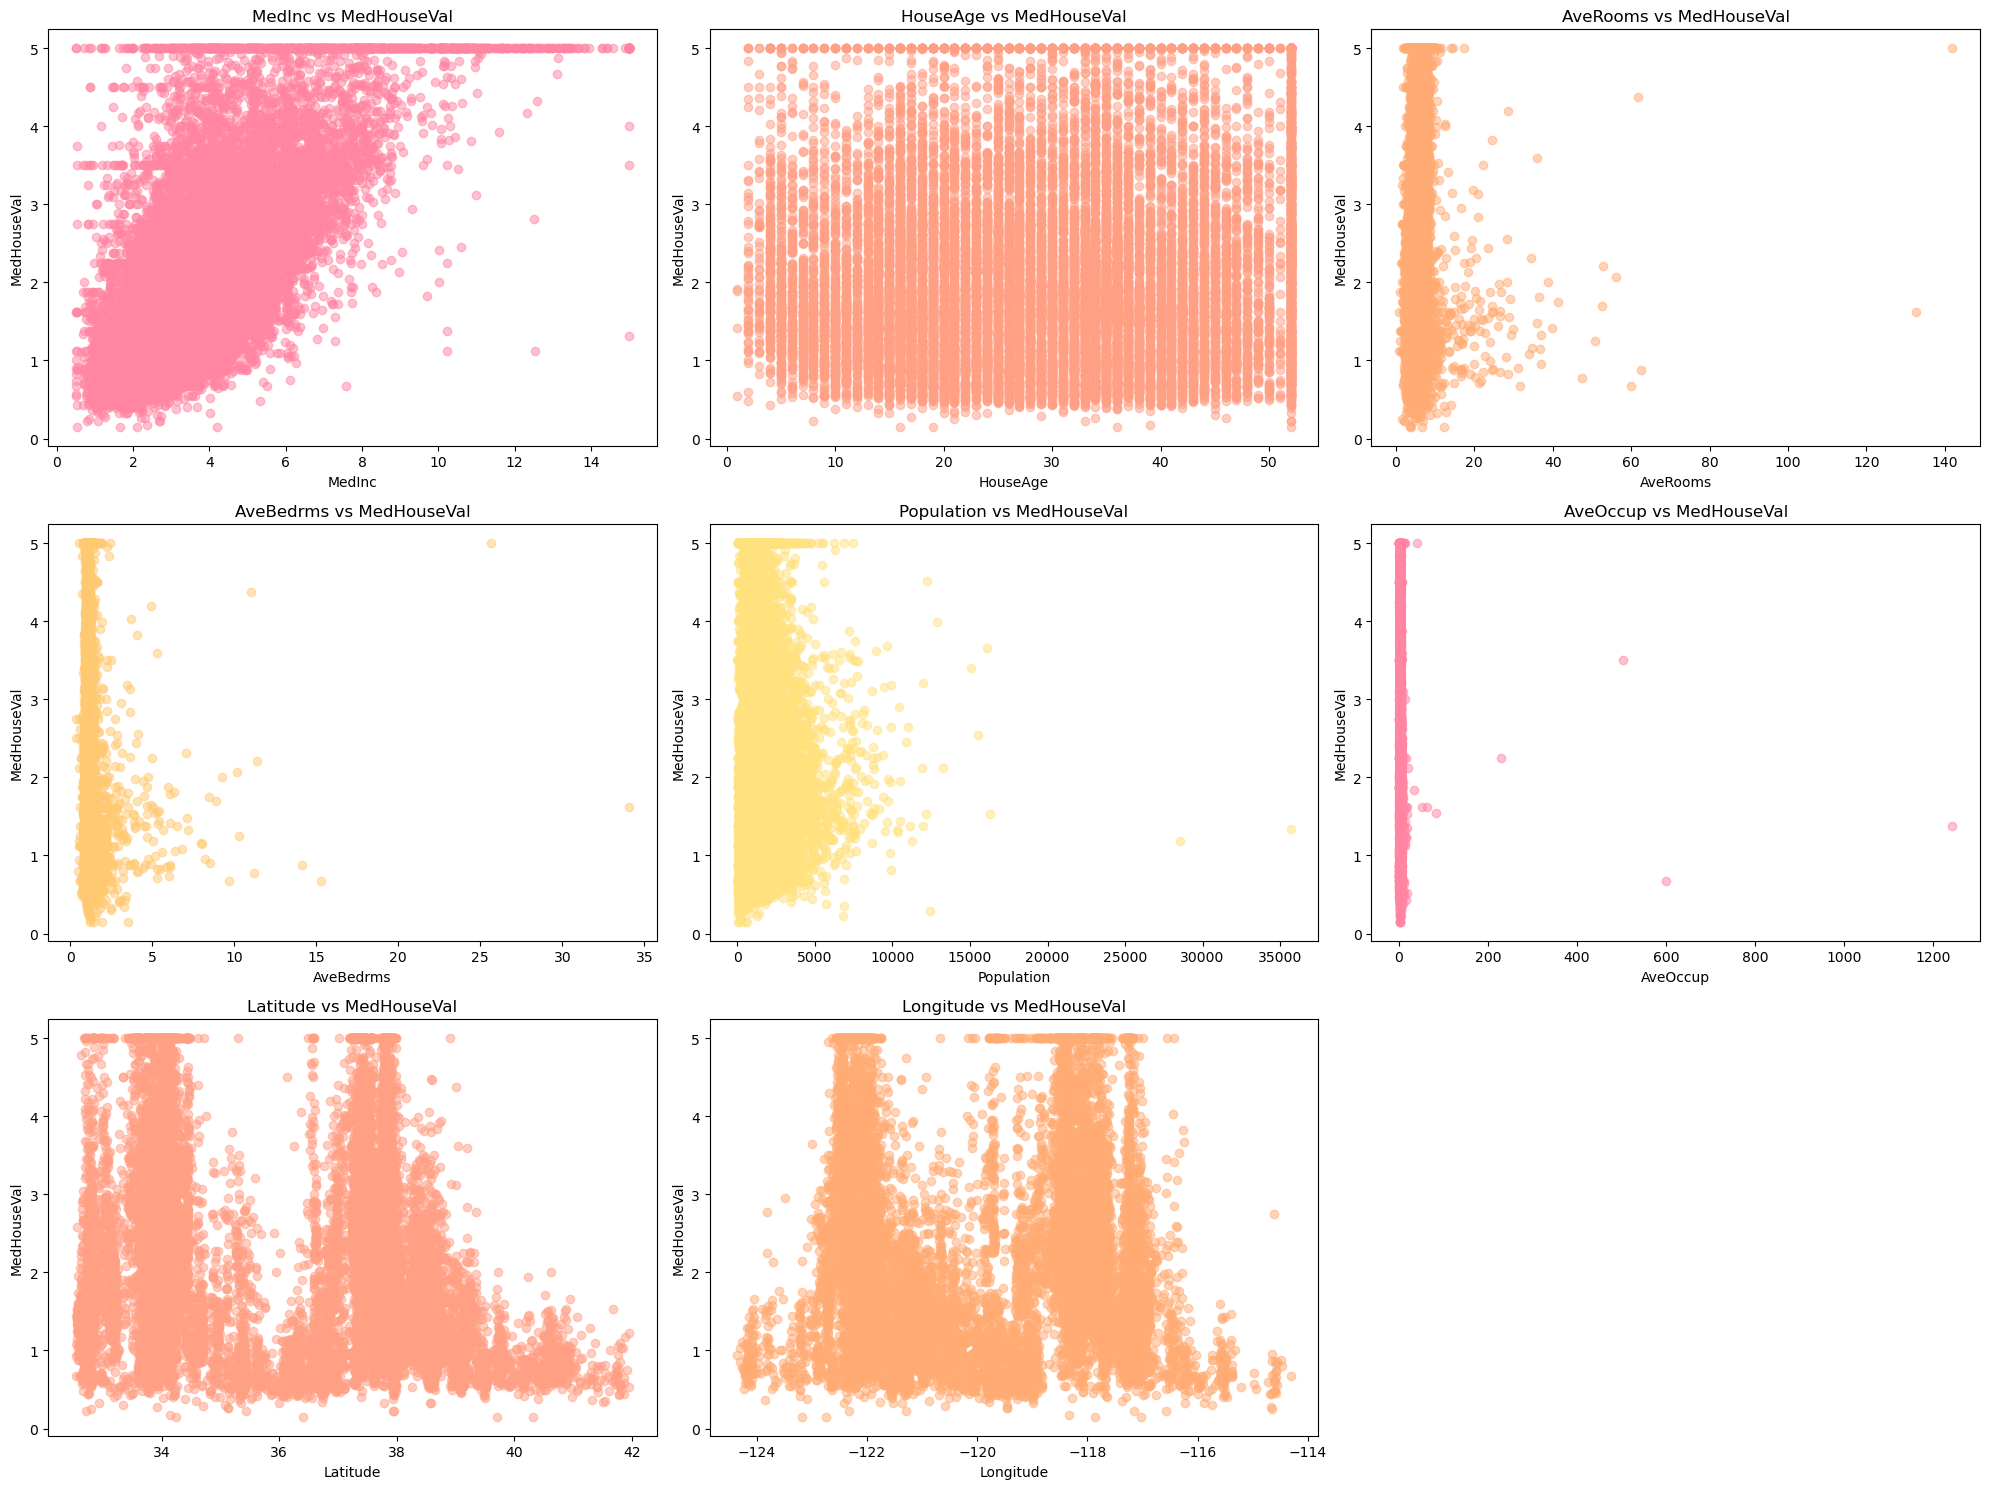

In [30]:
# Scatter plot of features against the target variable with custom color palette
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.scatter(df[feature], df['MedHouseVal'], alpha=0.5, color=flourish_palette[i % len(flourish_palette)])
    plt.title(f"{feature} vs MedHouseVal")
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')

plt.tight_layout()
plt.show()

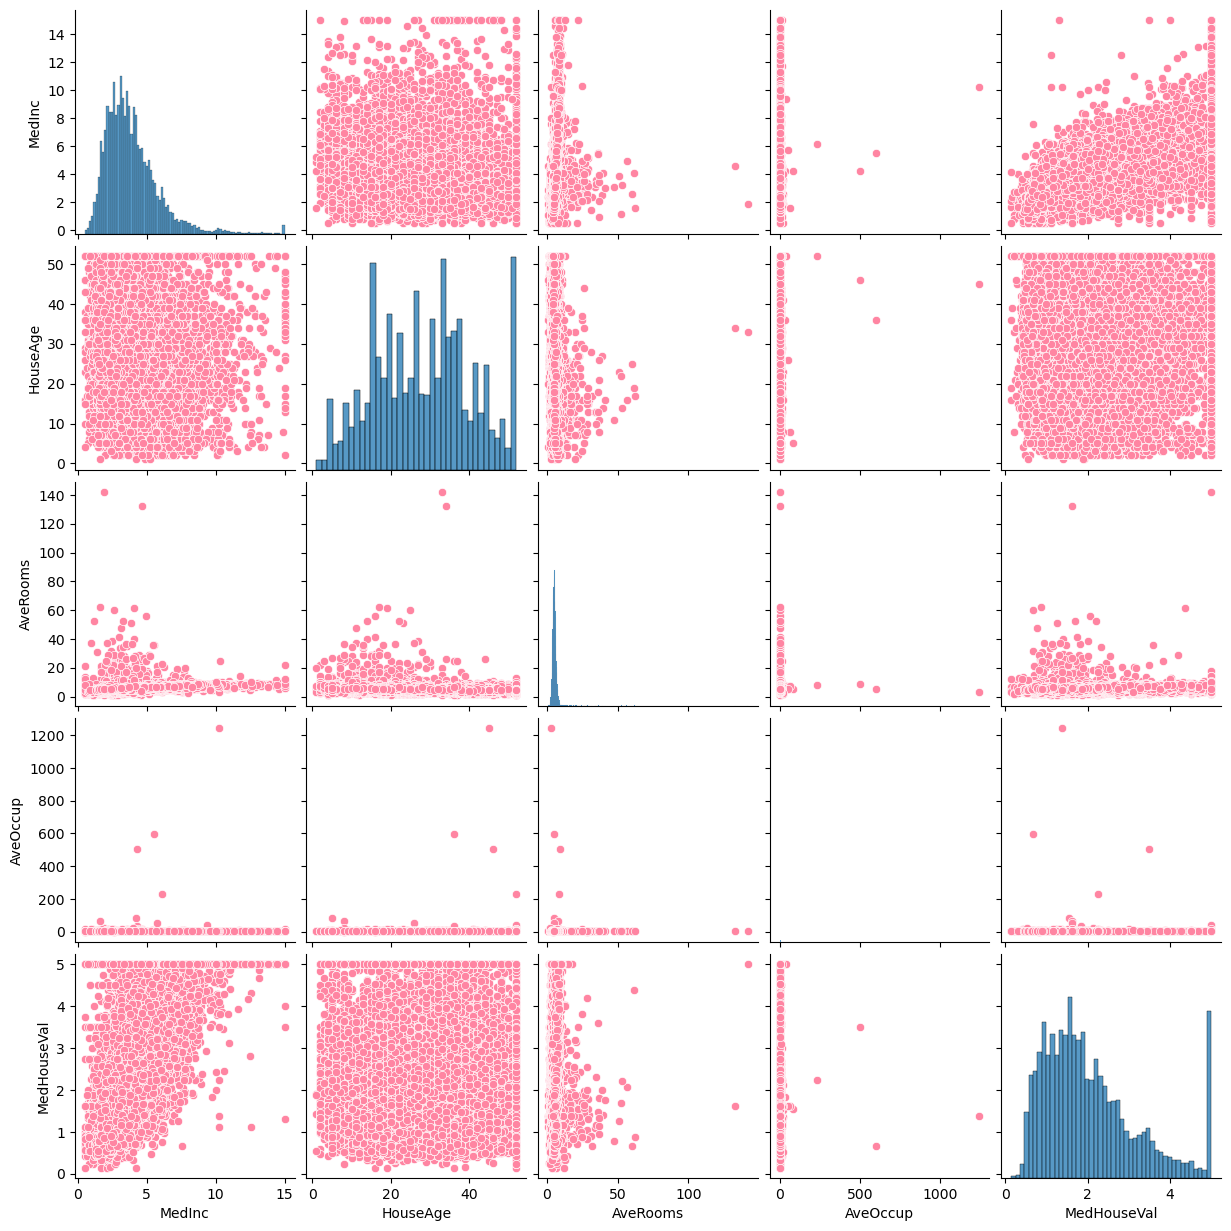

In [33]:
# Pairplot for selected features and target with custom color palette
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']], plot_kws={'color': flourish_palette[0]})
plt.show()

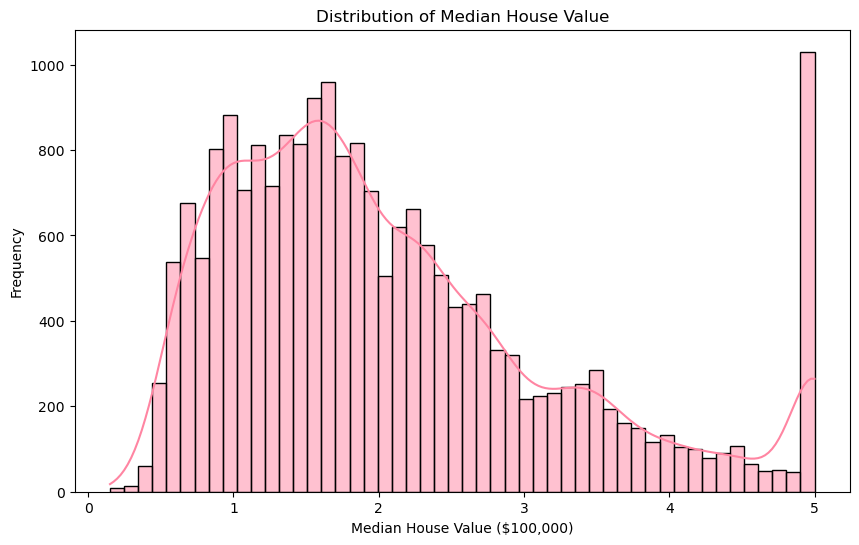

In [32]:
# Distribution of the target variable with custom color palette
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color=flourish_palette[0])
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.ylabel('Frequency')
plt.show()

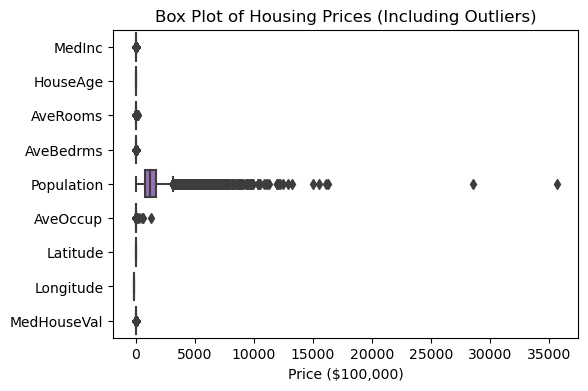

In [40]:
# Create a box plot to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Housing Prices (Including Outliers)')
plt.xlabel('Price ($100,000)')
plt.show()

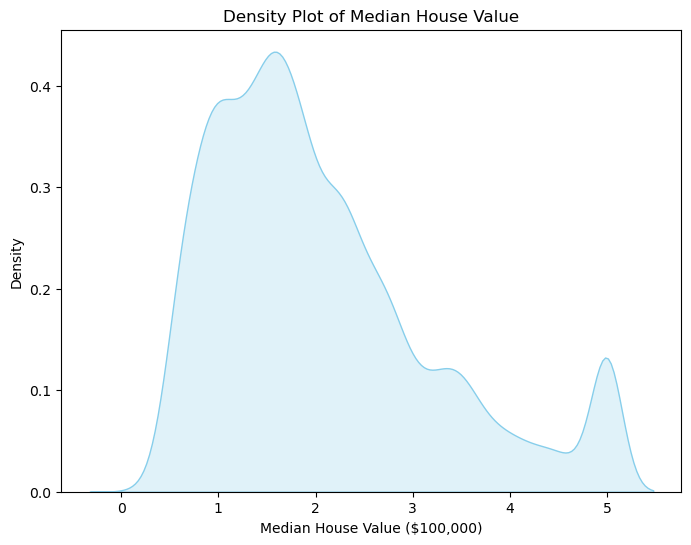

In [111]:
# Density plot of the target variable
plt.figure(figsize=(8, 6))
sns.kdeplot(df['MedHouseVal'], shade=True, color='skyblue')
plt.title('Density Plot of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.ylabel('Density')
plt.show()

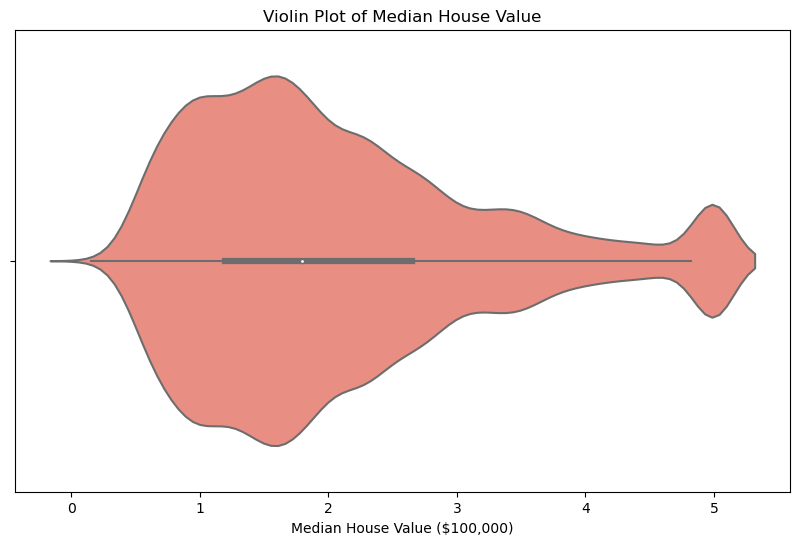

In [112]:
# Violin plot of median house value
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['MedHouseVal'], color='salmon')
plt.title('Violin Plot of Median House Value')
plt.xlabel('Median House Value ($100,000)')
plt.show()

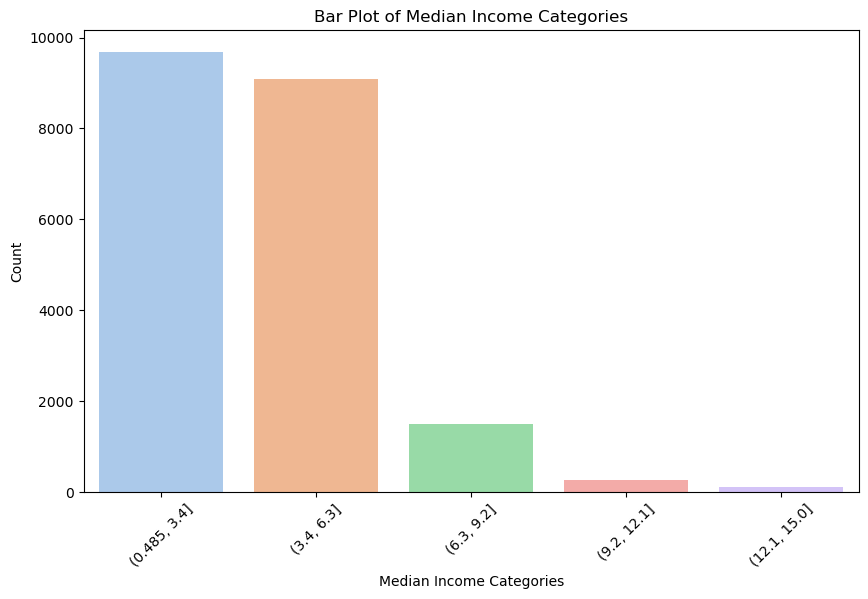

In [113]:
# Bar plot of median income categories
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(df['MedInc'], bins=5), palette='pastel')
plt.title('Bar Plot of Median Income Categories')
plt.xlabel('Median Income Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

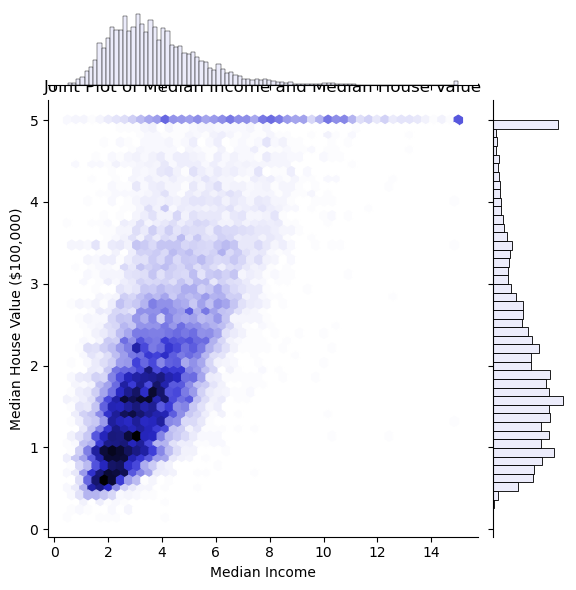

In [114]:
# Joint plot of median income and median house value
sns.jointplot(x='MedInc', y='MedHouseVal', data=df, kind='hex', color='lavender')
plt.title('Joint Plot of Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value ($100,000)')
plt.show()

# Export The Dataset

In [36]:
# Export the DataFrame to a CSV file
df.to_csv('california_housing_dataset.csv', index=False)

In [37]:
# Find the minimum and maximum prices
min_price = df['MedHouseVal'].min()
max_price = df['MedHouseVal'].max()

print(f"Minimum Price: ${min_price}")
print(f"Maximum Price: ${max_price}")

Minimum Price: $0.14999
Maximum Price: $5.00001


In [38]:
# Find the difference between maximum and minimum prices
price_difference = max_price - min_price

print(f"Difference between Maximum and Minimum Prices: ${price_difference}")

Difference between Maximum and Minimum Prices: $4.85002


# MACHINE LEARNING-Linear Regression

In [59]:
# Feature matrix X and target vector y
U = df.drop('MedHouseVal', axis=1)
V = df['MedHouseVal']

In [60]:
U

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
V

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [77]:
# Feature matrix X and target vector y
X = np.array(df.drop('MedHouseVal', axis=1))
y = np.array(df['MedHouseVal'])

In [78]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [79]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
len(X_train)

16512

In [82]:
len(y_train)

16512

In [83]:
len(X_test)

4128

In [84]:
len(y_test)

4128

Choose the model - Linear Regression

In [85]:
# Initialize and train the linear regression model
model = LinearRegression()

In [86]:
#Fitting/Train the model
model.fit(X_train, y_train)

LinearRegression()

In [87]:
model.intercept_

-37.023277706063986

In [88]:
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [89]:
# Predict housing prices on the testing set
y_pred = model.predict(X_test)

In [90]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

# Testing the model performance

In [91]:
#model score
model.score(X_test,y_test)

0.5757877060324526

In [94]:
#R Squared
r2_score(y_test,y_pred)

0.5757877060324526

In [96]:
#mean Squared error
mean_squared_error(y_test, y_pred)

0.5558915986952421

In [97]:
#mean absolute error
mean_absolute_error(y_test, y_pred)

0.5332001304956983

In [101]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, y_pred))

0.7455813830127749

In [102]:
#Adjusted R Squared
# Calculate the number of samples (n) and number of predictors (p)
n = X.shape[0]  # Number of samples
p = X.shape[1]  # Number of predictors (features)

# Calculate the R-squared (R2) score of the model on the testing data
r2 = model.score(X_test, y_test)

# Calculate the adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Adjusted R-squared (R2): {adjusted_r2}")

Adjusted R-squared (R2): 0.5756232109351843


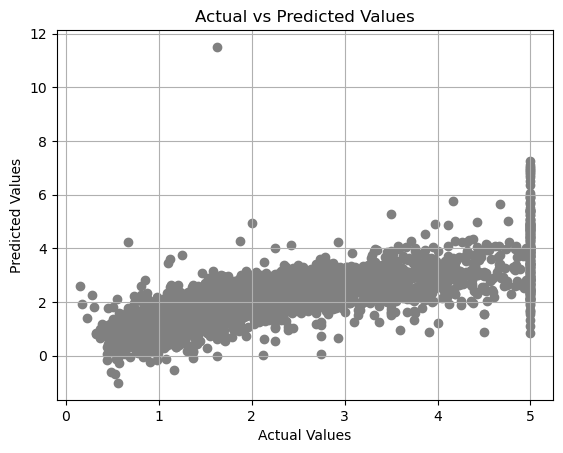

In [110]:
# Scatter plot of actual versus predicted values 
plt.scatter(y_test, y_pred, color='grey')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.plot(min(y_test),max(y_test),min(y_test),max(y_test), color = 'black')
plt.title('Actual vs Predicted Values')
plt.show()

In [115]:
# Calculate residuals
residuals = y_test - y_pred

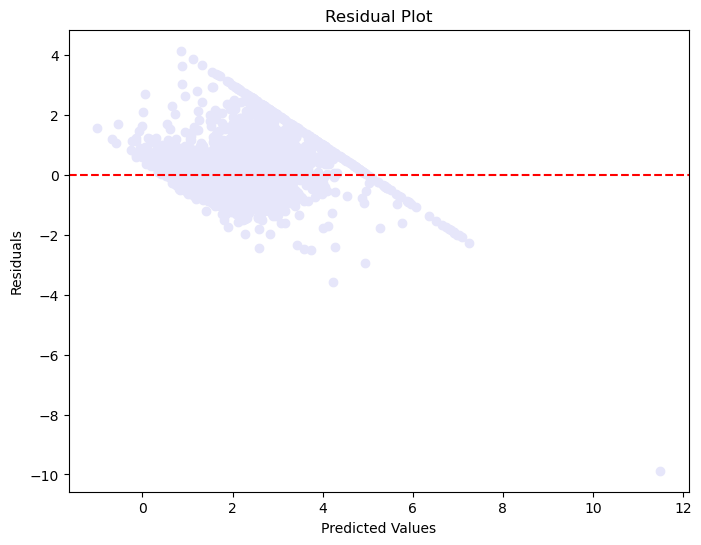

In [116]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='lavender')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

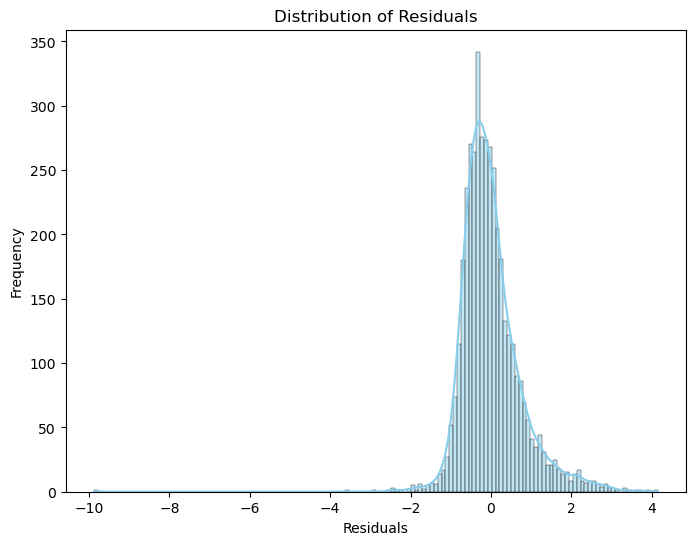

In [117]:
# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

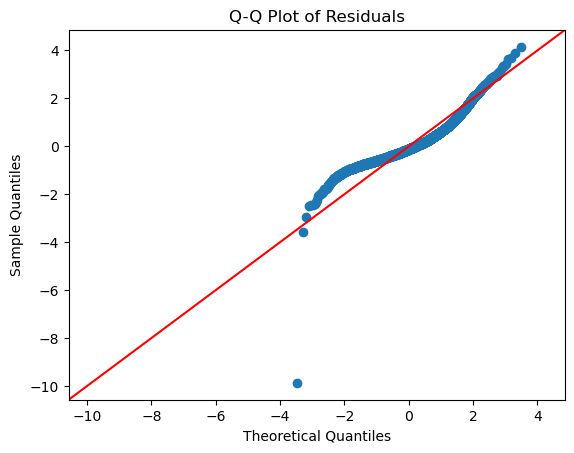

In [118]:
# Q-Q plot
import statsmodels.api as sm

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', color='salmon')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()



In [119]:
# Predict prices on the entire dataset (optional)
prices_pred = model.predict(X)
df['PredictedMedHouseVal'] = prices_pred

In [120]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PredictedMedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.151943
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.999520
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.673580
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.258795
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.402847


# Interactive Web Dashboard

In [135]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the California Housing Prices dataset
df = pd.read_csv('California Housing Prices.csv')

# Define the app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("California Housing Prices Prediction"),
    html.Label("Enter features:"),
    dcc.Input(id='med_inc', type='number', placeholder='Median Income'),
    dcc.Input(id='house_age', type='number', placeholder='House Age'),
    dcc.Input(id='ave_rooms', type='number', placeholder='Average Rooms'),
    dcc.Input(id='ave_bedrms', type='number', placeholder='Average Bedrooms'),
    dcc.Input(id='population', type='number', placeholder='Population'),
    dcc.Input(id='ave_occup', type='number', placeholder='Average Occupancy'),
    dcc.Input(id='latitude', type='number', placeholder='Latitude'),
    dcc.Input(id='longitude', type='number', placeholder='Longitude'),
    html.Br(),
    html.Button('Predict', id='predict-btn', n_clicks=0),
    html.Br(),
    html.Div(id='prediction-output')
])

# Define callback to update output
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-btn', 'n_clicks')],
    [Input('med_inc', 'value'),
     Input('house_age', 'value'),
     Input('ave_rooms', 'value'),
     Input('ave_bedrms', 'value'),
     Input('population', 'value'),
     Input('ave_occup', 'value'),
     Input('latitude', 'value'),
     Input('longitude', 'value')]
)
def update_output(n_clicks, med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude):
    if n_clicks > 0:
        # Prepare features for prediction
        features = [[med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude]]
        
        # Load the trained linear regression model
        model = LinearRegression()
        X = df.drop(columns=['MedHouseVal'])
        y = df['MedHouseVal']
        model.fit(X, y)
        
        # Make prediction
        prediction = model.predict(features)[0]
        return f"Predicted Housing Price: ${prediction:,.2f}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
Cell In[135], line 51, in update_output(
    n_clicks=1,
    med_inc=3,
    house_age=2,
    ave_rooms=2,
    ave_bedrms=2,
    population=5,
    ave_occup=4,
    latitude=6,
    longitude=6
)
     49 # Load the trained linear regression model
     50 model = LinearRegression()
---> 51 X = df.drop(columns=['MedHouseVal'])
        X = array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289,